In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier


In [55]:
bd = load_boston()
df = pd.DataFrame(bd.data, columns=bd.feature_names)
df['MEDV'] = bd.target

In [56]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [57]:
X = df.drop('MEDV',axis=1)
y = df.MEDV

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
predictions = lr.predict(X_test)

In [62]:
r2_score(y_test, predictions)

0.7112260057484903

In [63]:
model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)

In [64]:
model.fit(X_train,  y_train.astype('int'))

RandomForestClassifier(max_depth=12, random_state=42)

In [65]:
predictions_m = model.predict(X_test)

In [66]:
r2_score(y_test, predictions_m)


0.7999221353103914

В данном примере модель классификации работает лучше(коэффициент детерминации 0.799 по сравнению с 0.711 в регрессионной модели).

In [73]:
fi = model.feature_importances_
fidf = pd.DataFrame({'features':list(X_train), 'feature_importances':fi})
fidf.feature_importances.sum()

0.9999999999999998

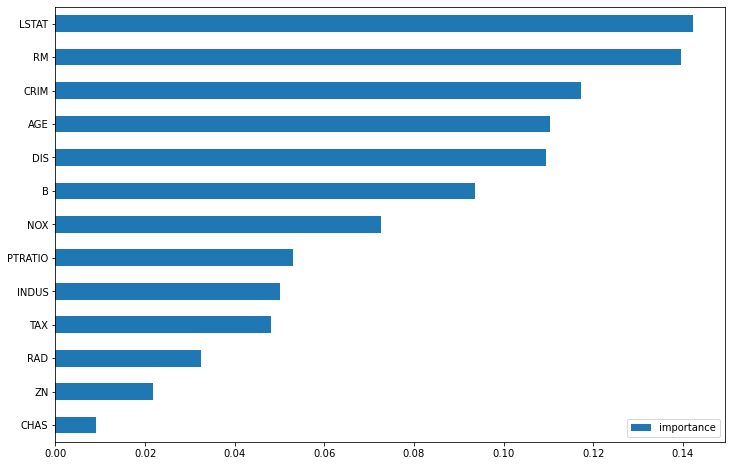

In [72]:
imp = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

Наибольшую важность имеют показатели LSTAT и RM, сумма всех показателей важности равна единице